# Chapter 2 - Statistics, Probability, and Noise

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Histogram, probability mass function, and probability density function

[matplotlib.pyplot.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)

<strong>Histogram</strong> can be used to visualize how the discrete signal values are distributed. The histogram groups samples together that have the same value. If you sum up all the numbers of occurrence in the histogram, you can get the total number of samples, N.  The number of bins controls a tradeoff between resolutions along the y-axis and the x-axis. Hence, binning is an important technique. 

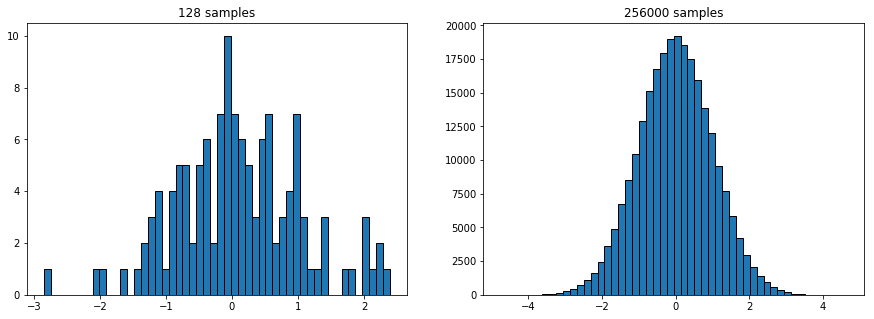

In [2]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

x = np.random.normal(size=128) # 128 random numbers with normal distribution
axs[0].hist(x,  bins = 50, ec='black')
axs[0].set_title('128 samples')

x = np.random.normal(size=256000) # 256000 random numbers  with normal distribution
axs[1].hist(x,  bins = 50, ec='black')
axs[1].set_title('256000 samples')

plt.show()

If you divide the histogram by N, you can get the <strong>probability mass function (pmf)</strong>. The pmf describes the probability that a certain value will be generated. It should be reiterated that the pmf can be defined for discrete signals. For continuous signals, the <strong>probability density function (pdf)</strong> is used instead. This function is not probability, but probability density. In order to calculate probability, the probability density is multiplied by a range of values. In most cases, integration is required. The integral of the pdf is called <strong>cumulative distribution function (cdf)</strong>.

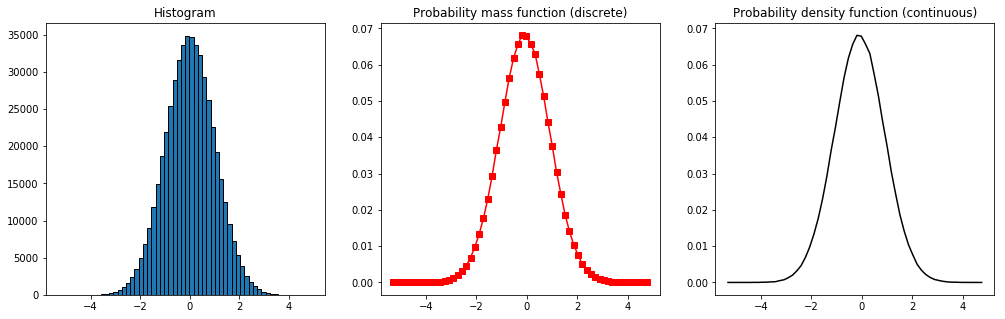

In [8]:
N = 512000 # sample number 
n_bins=60 # number of bins

fig, axs = plt.subplots(1,3, figsize=(17,5))

x = np.random.normal(size=N) # 256000 random numbers  with normal distribution
coun, x_axis, _=axs[0].hist(x,  bins = n_bins, ec='black')
axs[0].set_title('Histogram')

axs[1].plot( x_axis[:-1], coun/N, marker='s', color='red', markersize=6)
axs[1].set_title('Probability mass function (discrete)')

axs[2].plot( x_axis[:-1], coun/N, color='black')
axs[2].set_title('Probability density function (continuous)')

plt.show()

## Power of Binning

The number of bins controls a tradeoff between resolutions in along the y and x -axes. 

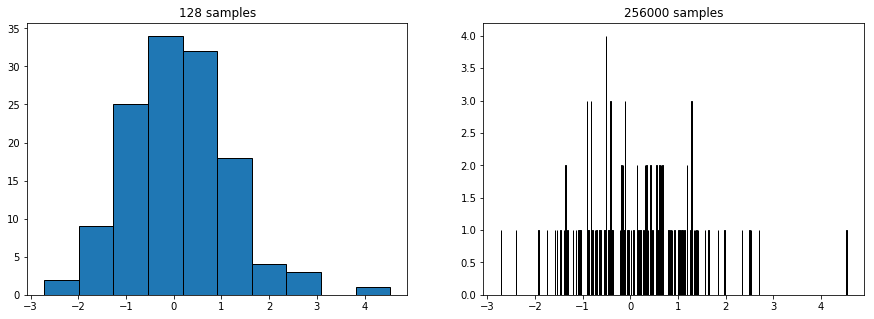

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

x = np.random.normal(size=128) # 128 random numbers with normal distribution
axs[0].hist(x,  bins = 10, ec='black')
axs[0].set_title('10 bins')

axs[1].hist(x,  bins = 601, ec='black')
axs[1].set_title('601 bins')

plt.show()

## Digital Noise Generation

### Central Limit Theorem
When generating normally-distributed random numbers, it is important to keep the following things in mind:

- When independent random signals are added, the variances also add.
- The central limit theorem states that a sum of random numbers becomes normally distributed as more and more of the random numbers are added together.
- Whenever many different random forces are interacting, the resulting pdf becomes a Gaussian.

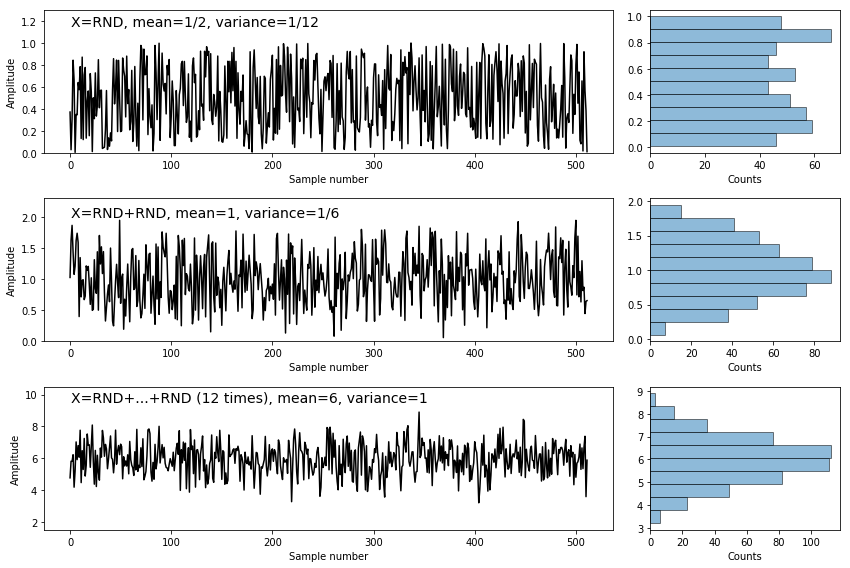

In [122]:
num_samples=512


### Y = RND ###
Y = np.random.uniform(low=0.0, high=1.0, size=num_samples) # uniform distribution
x=np.linspace(0,num_samples-1,num_samples)


fig = plt.figure(figsize = (12,8))
gs = gridspec.GridSpec(3,2, width_ratios=[3,1]) 

ax0 = plt.subplot(gs[0]) 
ax0.plot(x,Y, color='black')
ax0.set(ylabel='Amplitude')
ax0.set(xlabel = 'Sample number')
ax0.set(ylim=(0, 1.3))
ax0.text(1, 1.15, "X=RND, mean=1/2, variance=1/12", fontsize=14)

ax1 = plt.subplot(gs[1])
ax1.hist(Y, orientation='horizontal', bins=10, ec='black', alpha=0.5)
ax1.set(xlabel = 'Counts')


### Y = RND + RND ###
Y = np.random.uniform(low=0.0, high=1.0, size=num_samples) + np.random.uniform(low=0.0, high=1.0, size=num_samples) 
# uniform distribution

ax2 = plt.subplot(gs[2]) 
ax2.plot(x,Y, color='black')
ax2.set(ylabel='Amplitude')
ax2.set(xlabel = 'Sample number')
ax2.set(ylim=(0, 2.3))
ax2.text(1, 2, "X=RND+RND, mean=1, variance=1/6", fontsize=14)


ax3 = plt.subplot(gs[3])
ax3.hist(Y, orientation='horizontal', bins=10, ec='black', alpha=0.5)
ax3.set(xlabel = 'Counts')


### Y = RND + RND+ RND+ RND+ RND+ RND+ RND+ RND+ RND+ RND+ RND+ RND (12 times) ###

Y=0
for i in range(12):
    Y= Y + np.random.uniform(low=0.0, high=1.0, size=num_samples)

ax4 = plt.subplot(gs[4]) 
ax4.plot(x,Y, color='black')
ax4.set(ylabel='Amplitude')
ax4.set(xlabel = 'Sample number')
ax4.set(ylim=(1.5, 10.5))
ax4.text(1, 9.5, "X=RND+...+RND (12 times), mean=6, variance=1", fontsize=14)


ax5 = plt.subplot(gs[5])
ax5.hist(Y, orientation='horizontal', bins=10, ec='black', alpha=0.5)
ax5.set(xlabel = 'Counts')

fig.tight_layout()
plt.show()

### Another approach

Y = (-2logR<sub>1</sub>)<sup>1/2</sup>cos(2&pi;R<sub>2</sub>),  
where R<sub>1</sub> and R<sub>2</sub> are random numbers with normal distribution.

In [167]:
def normal_distribution(x,sigma,mu): # normal distribution
# sigma: standard deviation
# mu: mean
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*(x-mu)*(x-mu)/sigma/sigma)

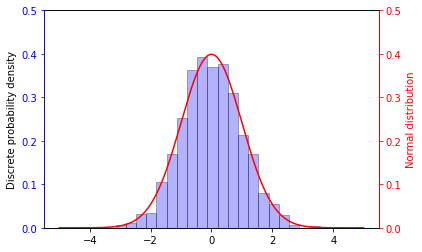

In [170]:
num_samples= 2048

R1 = np.random.uniform(low=0.0, high=1.0, size=num_samples)
R2 = np.random.uniform(low=0.0, high=1.0, size=num_samples)

Y= np.sqrt(-2*np.log(R1)) * np.cos(2*np.pi*R2)

x=np.linspace(-5,5,2001)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(Y, ec='black',bins=20, alpha=0.3, color='blue', density=True) # histogram
ax.set(ylabel='Discrete probability density') # ylabel
ax.set(ylim=(0,0.5)) # ylimit
ax.tick_params(axis='y', colors='blue') # color of y-axis numbers

ax2=ax.twinx() 
ax2.plot(x,normal_distribution(x,1,0),color='red') # nor
ax2.set_ylabel('Normal distribution', color='red')
ax2.set_ylim(0,0.5)
ax2.tick_params(axis='y', colors='red')


ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')

plt.plot()
None

## Precision and Accuracy

- <strong>Precision</strong>: a measure of random noise. Averaging several measurements always improves the precision. The width of the distribution is related to precision.
- <strong>Accuracy</strong>: a measure of calibration. In other words, it is related to the difference between mean and true value. Averaging data does not improve the accuracy. Accuracy depends on how you calibrate your system. Poor accuracy results from systematic errors. 

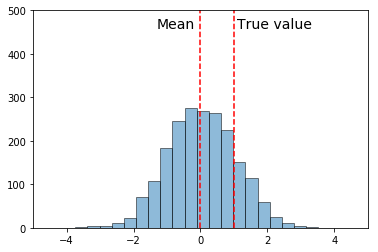

In [199]:
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)

Y = np.random.normal(size=2048) 

ax.hist(Y,bins=20, ec='black', alpha=0.5)
ax.set_ylim(0,500)
ax.set_xlim(-5,5)
ax.plot([0,0],[0,1000], linestyle='--', color='red')
ax.plot([1,1],[0,1000], linestyle='--', color='red')
ax.text(-1.3, 460,'Mean',fontsize=14)
ax.text(1.1, 460,'True value',fontsize=14)


plt.show()